In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets, ensemble, model_selection, preprocessing

In [2]:
data = datasets.load_breast_cancer()
data.data.shape

(569, 30)

In [3]:
rfc = ensemble.RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=30)
score_mean = model_selection.cross_val_score(rfc, data.data, data.target, cv=10).mean()
score_mean

0.9580114078299197

0.9632443176907787 131


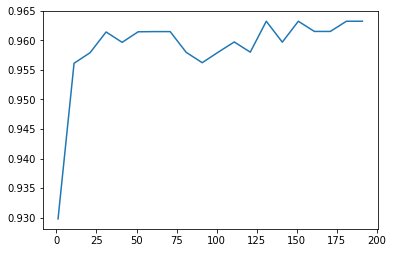

In [5]:
# 调参第一步 先调estimators
scores = []
for i in range(1, 200, 10):
    rfc = ensemble.RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=30)
    score_mean = model_selection.cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scores.append(score_mean)
print(max(scores), scores.index(max(scores))*10+1)
plt.plot(range(1, 200, 10), scores)
plt.show()

0.9632443176907787 129


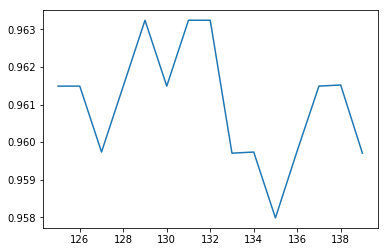

In [7]:
# 在大致确定好范围后，进一步细化范围，找到最佳的estimator
scores = []
for i in range(125, 140):
    rfc = ensemble.RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=30)
    score_mean = model_selection.cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scores.append(score_mean)
max_score_index = scores.index(max(scores))
print(max(scores), 125 + max_score_index)
plt.plot(range(125, 140), scores)
plt.show()

In [9]:
# 接下来调节max_depth
param_grid = {'max_depth': np.arange(1, 20, 1)}
rfc = ensemble.RandomForestClassifier(n_estimators=129, n_jobs=-1, random_state=30)
grid_search = model_selection.GridSearchCV(rfc, param_grid=param_grid, cv=10)
grid_search.fit(data.data, data.target)

print('grid_search.best_params_', grid_search.best_params_)
print('grid_search.best_score_', grid_search.best_score_)


grid_search.best_params_ {'max_depth': 10}
grid_search.best_score_ 0.9630931458699473


In [10]:
# 很显然这个准确率降低了 说明我把结果推到泛化误差最低点的左边，现在我们应该调节参数，增大模型复杂度，把模型在往
# 右推一点，然后min_sample_split, min_sample_leaf,已经是模型复杂化最大，现在只能调节max_features
# max_features 默认值是特征总数开平方 sqart(30) 介于5~6之间
param = {'max_features': np.arange(5, 30, 1)}
rfc = ensemble.RandomForestClassifier(n_estimators=129, n_jobs=-1, random_state=30)
GS = model_selection.GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(data.data, data.target)

print('grid_search.best_params_', grid_search.best_params_)
print('grid_search.best_score_', grid_search.best_score_)

grid_search.best_params_ {'max_depth': 10}
grid_search.best_score_ 0.9630931458699473


In [11]:
# 右上面的结果可以看出 比刚才的最大值小一些 说明我们有推过了 由此说明刚才那个已经是极限了 
# min_sample_leaf, min_sample_split 同样可以这样来调
# 最后我们在尝试一下 criterion
param = {'criterion': ('entropy', 'gini')}
rfc = ensemble.RandomForestClassifier(n_estimators=129, n_jobs=-1, random_state=30)
GS = model_selection.GridSearchCV(rfc, param_grid=param_grid, cv=10)
GS.fit(data.data, data.target)

print('grid_search.best_params_', grid_search.best_params_)
print('grid_search.best_score_', grid_search.best_score_)

grid_search.best_params_ {'max_depth': 10}
grid_search.best_score_ 0.9630931458699473
